<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/NaiveBayesMultinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing the data file in dataframe formate
data=pd.read_csv('/content/apple.csv')
print(data)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...    ...       ...       ...        ...          ...        ...       ...   
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
0    -0.491590    good  
1

In [ ]:
data.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [ ]:
#performing the labelencoding for the categorical data
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.columns:
    if data['Quality'].dtype == 'object':
        label_encoders['Quality'] = LabelEncoder()

# Fit and transform each categorical column
for column, encoder in label_encoders.items():
    data['Quality'] = encoder.fit_transform(data['Quality'])
print(data)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...    ...       ...       ...        ...          ...        ...       ...   
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  Quality  
0    -0.491590        1  

In [ ]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
data.duplicated().sum()

0

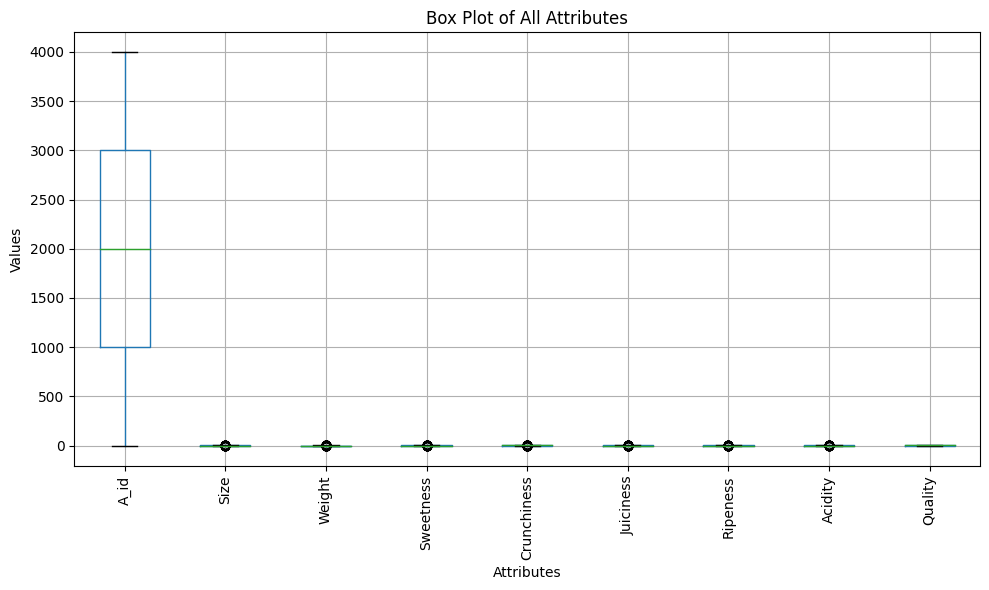

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Handling outliers
def handle_outliers(data, threshold=3):
    numerical_columns = data.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        data = data[z_scores < threshold]
    return data

# Call the function to handle outliers
cleaned_data = handle_outliers(data)
print(cleaned_data)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...    ...       ...       ...        ...          ...        ...       ...   
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  Quality  
0    -0.491590        1  

In [ ]:
# Step 4: Perform exploratory data analysis (EDA)
print("Data Info:")
print(cleaned_data.info())
print("\nData Description:")
print(cleaned_data.describe())
print("\nClass Distribution:")
print(cleaned_data['Quality'].value_counts())

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3902 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         3902 non-null   int64  
 1   Size         3902 non-null   float64
 2   Weight       3902 non-null   float64
 3   Sweetness    3902 non-null   float64
 4   Crunchiness  3902 non-null   float64
 5   Juiciness    3902 non-null   float64
 6   Ripeness     3902 non-null   float64
 7   Acidity      3902 non-null   float64
 8   Quality      3902 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 304.8 KB
None

Data Description:
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  3902.000000  3902.000000  3902.000000  3902.000000  3902.000000   
mean   1996.982573    -0.511782    -0.990527    -0.470001     0.980879   
std    1154.349564     1.886113     1.549951     1.909199     1.335021   
min       0.000000    -6.099551    -5.746384    -5.958

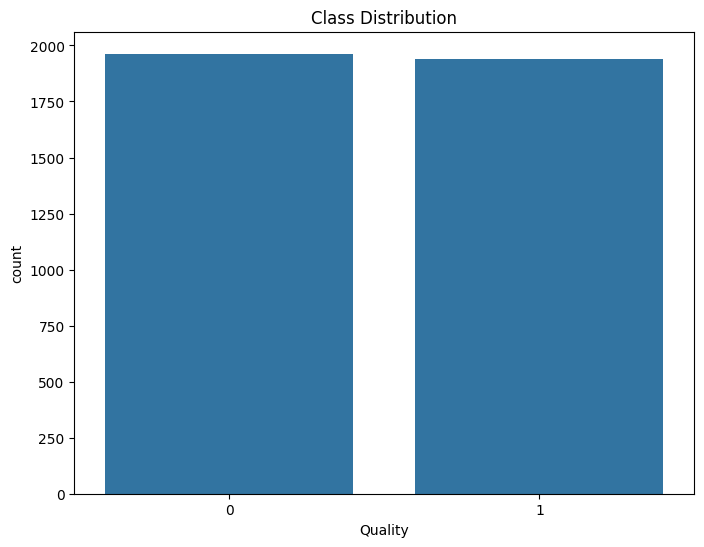

In [ ]:
# Plotting class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=cleaned_data)
plt.title('Class Distribution')
plt.show()


In [ ]:
# Assuming the label column is named 'quality' and the rest are features
X = cleaned_data.drop('Quality', axis=1)
y = cleaned_data['Quality']

In [ ]:
# Convert negative data to positive data using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train the Multinomial Naive Bayes (MNB) model
mnb = MultinomialNB()

# Step 6: Fit the model
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Step 7: Evaluate the performance of the model
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[0 0 1 ... 1 0 1]
[0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0
 1 1 0 

In [ ]:
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.6924062800384492
Testing Accuracy:  0.6978233034571063


In [ ]:
# Step 8: Make predictions using the model
predictions = mnb.predict(X_test)
print(predictions)

[0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 1 

In [ ]:
# Step 9: Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[292 109]
 [127 253]]


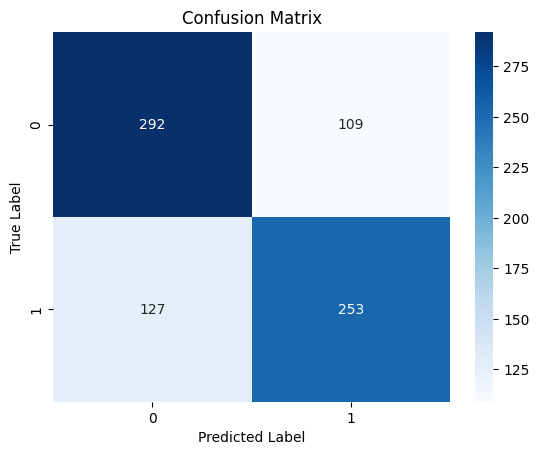

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 10: Visualize results with classification report
class_report = classification_report(y_test, predictions, output_dict=True)
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       401
           1       0.70      0.67      0.68       380

    accuracy                           0.70       781
   macro avg       0.70      0.70      0.70       781
weighted avg       0.70      0.70      0.70       781



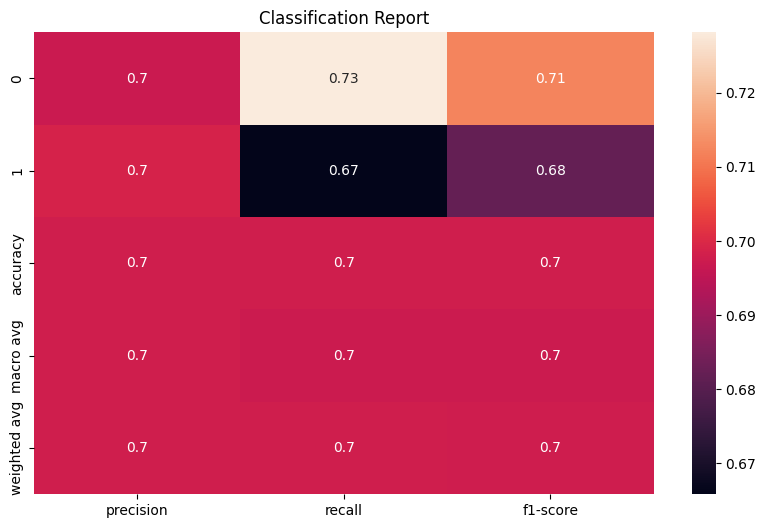

In [ ]:
# Plotting classification report
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()
